In [1]:
import pandas as pd

ais = pd.read_csv("Dataset_24July1.csv",sep=",")
ais.head()

C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_12872\3536955513.py:3: DtypeWarning: Columns (4,9,17) have mixed types. Specify dtype option on import or set low_memory=False.
  ais = pd.read_csv("Dataset_24July1.csv",sep=",")


,Timestamp,Packet Type,Channel,Message Type,MMSI,Navigation Status,Repeat Indicator,IMO,ROT,SOG,...,Maneuver Indicator,Draught,Position fix type,Call sign,ETA,A,B,C,D,Error
0,2023-10-28 07:17:51.000,BSVDM,A,1.0,353246000,Underway using engine,0.0,0.0,Not turning,12.5,...,Not available (default),0.0,Undefined (default),0.0,NaN,0.0,0.0,0.0,0.0,NaN
1,2023-10-28 07:17:51.278,BSVDO,A,4.0,2579991,NaN,0.0,0.0,No turn info available,NaN,...,Not available (default),0.0,Internal GNSS,0.0,2023-10-28 07:12:19,0.0,0.0,0.0,0.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Checksum mismatch
3,2023-10-28 07:17:52.657,BSVDM,A,1.0,431697000,Underway using engine,0.0,0.0,Not turning,11.3,...,Not available (default),0.0,Undefined (default),0.0,NaN,0.0,0.0,0.0,0.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Checksum mismatch


In [2]:
#Remove rows where Longitude is 0
ais_cleaned = ais[(ais['Longitude'] != 0) & (ais['Latitude'] != 0)]

#Remove columns with any empty Timestamp values
ais_cleaned = ais_cleaned.dropna(subset=['Timestamp'], axis=0)

ais_cleaned.head()

,Timestamp,Packet Type,Channel,Message Type,MMSI,Navigation Status,Repeat Indicator,IMO,ROT,SOG,...,Maneuver Indicator,Draught,Position fix type,Call sign,ETA,A,B,C,D,Error
0,2023-10-28 07:17:51.000,BSVDM,A,1.0,353246000,Underway using engine,0.0,0.0,Not turning,12.5,...,Not available (default),0.0,Undefined (default),0.0,NaN,0.0,0.0,0.0,0.0,NaN
1,2023-10-28 07:17:51.278,BSVDO,A,4.0,2579991,NaN,0.0,0.0,No turn info available,NaN,...,Not available (default),0.0,Internal GNSS,0.0,2023-10-28 07:12:19,0.0,0.0,0.0,0.0,NaN
3,2023-10-28 07:17:52.657,BSVDM,A,1.0,431697000,Underway using engine,0.0,0.0,Not turning,11.3,...,Not available (default),0.0,Undefined (default),0.0,NaN,0.0,0.0,0.0,0.0,NaN
5,2023-10-28 07:17:54.998,BSVDM,B,1.0,538009733,Underway using engine,0.0,0.0,2.1873741283369905,16.4,...,Not available (default),0.0,Undefined (default),0.0,NaN,0.0,0.0,0.0,0.0,NaN
6,2023-10-28 07:17:55.937,BSVDM,B,1.0,477151600,Underway using engine,0.0,0.0,0.40176259500067163,14.5,...,Not available (default),0.0,Undefined (default),0.0,NaN,0.0,0.0,0.0,0.0,NaN


In [4]:
# Extract the latitude and longitude columns
latitude = ais_cleaned['Latitude']
longitude = ais_cleaned['Longitude']

# Calculate the geographical boundaries
min_latitude = latitude.min()
max_latitude = latitude.max()
min_longitude = longitude.min()
max_longitude = longitude.max()

# Print the results
print(f'Geographical Boundaries:')
print(f'Latitude range: {min_latitude} to {max_latitude}')
print(f'Longitude range: {min_longitude} to {max_longitude}')


Geographical Boundaries:
Latitude range: -12.813851666666665 to -4.945688333333337
Longitude range: 145.32865 to 208.12162


Visualization of coverage of the lat & long in this dataset

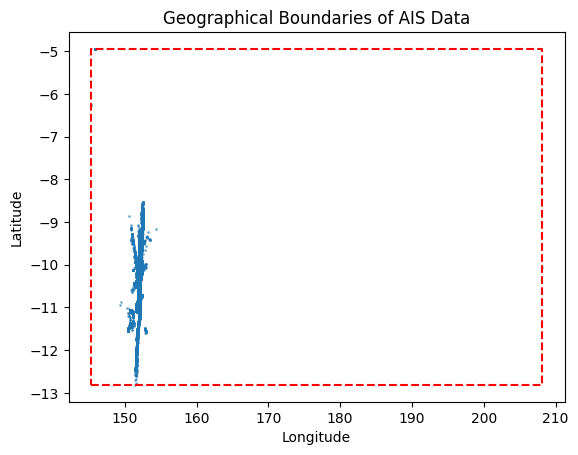

In [5]:
import matplotlib.pyplot as plt

# Plot the latitude and longitude points
plt.scatter(longitude, latitude, s=1, alpha=0.5)

# Draw the boundary box
plt.plot([min_longitude, max_longitude, max_longitude, min_longitude, min_longitude],
         [min_latitude, min_latitude, max_latitude, max_latitude, min_latitude],
         color='red', linestyle='--')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Boundaries of AIS Data')

# Show the plot
plt.show()


In [11]:
MMSI_subset = ais_cleaned[(ais_cleaned["MMSI"]=='538009733')]

In [12]:
MMSI_subset.sort_values("Timestamp")

,Timestamp,Packet Type,Channel,Message Type,MMSI,Navigation Status,Repeat Indicator,IMO,ROT,SOG,...,Maneuver Indicator,Draught,Position fix type,Call sign,ETA,A,B,C,D,Error
5,2023-10-28 07:17:54.998,BSVDM,B,1.0,538009733,Underway using engine,0.0,0.0,2.1873741283369905,16.4,...,Not available (default),0.0,Undefined (default),0.0,NaN,0.0,0.0,0.0,0.0,NaN
9,2023-10-28 07:18:01.821,BSVDM,A,3.0,538009733,Underway using engine,0.0,0.0,1.116007208335199,16.4,...,Not available (default),0.0,Undefined (default),0.0,NaN,0.0,0.0,0.0,0.0,NaN
17,2023-10-28 07:18:13.817,BSVDM,A,1.0,538009733,Underway using engine,0.0,0.0,Not turning,16.4,...,Not available (default),0.0,Undefined (default),0.0,NaN,0.0,0.0,0.0,0.0,NaN
42,2023-10-28 07:19:01.817,BSVDM,A,1.0,538009733,Underway using engine,0.0,0.0,Not turning,16.4,...,Not available (default),0.0,Undefined (default),0.0,NaN,0.0,0.0,0.0,0.0,NaN
49,2023-10-28 07:19:13.818,BSVDM,A,1.0,538009733,Underway using engine,0.0,0.0,251,16.4,...,Not available (default),0.0,Undefined (default),0.0,NaN,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753310,2023-11-20 15:47:00.744,BSVDM,B,1.0,538009733,Underway using engine,0.0,0.0,Not turning,18.2,...,Not available (default),0.0,Undefined (default),0.0,NaN,0.0,0.0,0.0,0.0,NaN
1753333,2023-11-20 15:47:25.384,BSVDM,B,1.0,538009733,Underway using engine,0.0,0.0,2.1873741283369905,18.2,...,Not available (default),0.0,Undefined (default),0.0,NaN,0.0,0.0,0.0,0.0,NaN
1753354,2023-11-20 15:47:49.278,BSVDM,B,1.0,538009733,Underway using engine,0.0,0.0,251,18.1,...,Not available (default),0.0,Undefined (default),0.0,NaN,0.0,0.0,0.0,0.0,NaN
1753398,2023-11-20 15:48:37.541,BSVDM,B,1.0,538009733,Underway using engine,0.0,0.0,Not turning,18.2,...,Not available (default),0.0,Undefined (default),0.0,NaN,0.0,0.0,0.0,0.0,NaN


Plotting the route in a map

In [14]:
#pip install shapely

     ---------------------------------------- 1.4/1.4 MB 10.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Programs Files\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [16]:
pip install geopandas

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Programs Files\Python\Python310\python.exe -m pip install --upgrade pip' command.



     ------------------------------------- 323.6/323.6 KB 10.1 MB/s eta 0:00:00
     --------------------------------------- 15.9/15.9 MB 15.2 MB/s eta 0:00:00
     ---------------------------------------- 6.1/6.1 MB 18.5 MB/s eta 0:00:00
     ---------------------------------------- 163.0/163.0 KB ? eta 0:00:00


In [18]:
pip install geodatasets

     ---------------------------------------- 64.6/64.6 KB ? eta 0:00:00
     ---------------------------------------- 64.9/64.9 KB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 121.4/121.4 KB ? eta 0:00:00
     ---------------------------------------- 100.3/100.3 KB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Programs Files\Python\Python310\python.exe -m pip install --upgrade pip' command.


<Axes: >

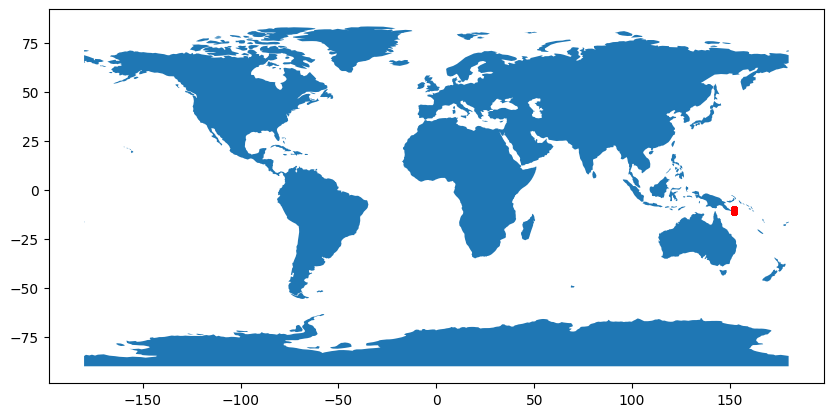

In [19]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets

geometry = [Point(xy) for xy in zip(MMSI_subset['Longitude'], MMSI_subset['Latitude'])]
gdf = GeoDataFrame(MMSI_subset, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)

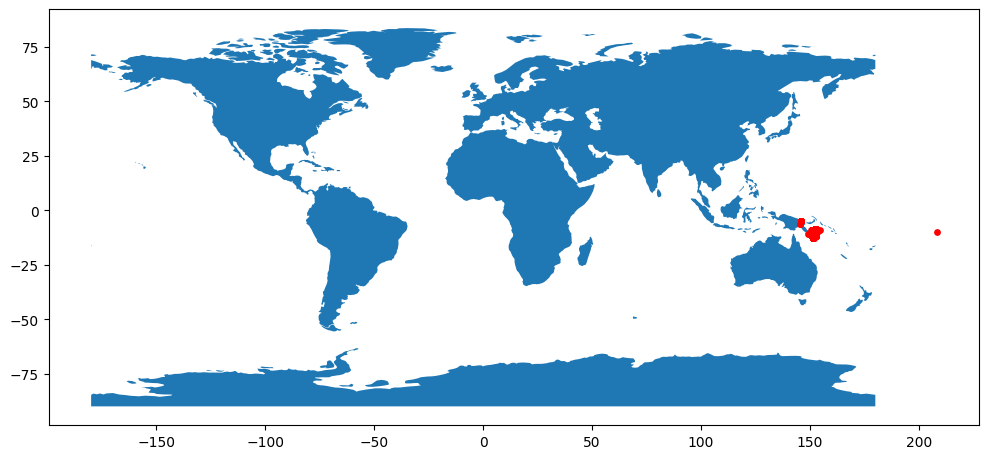

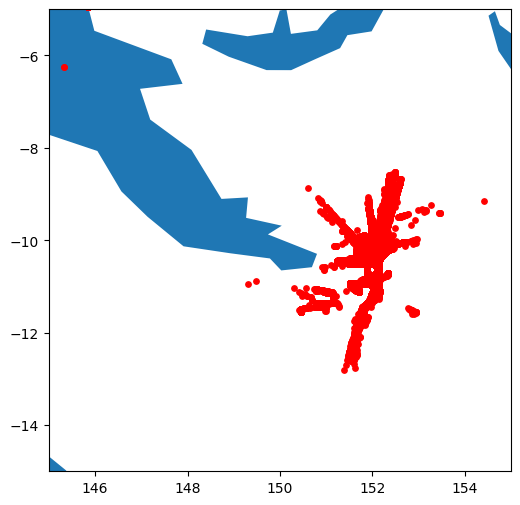

In [26]:
geometry = [Point(xy) for xy in zip(ais_cleaned['Longitude'], ais_cleaned['Latitude'])]
gdf = GeoDataFrame(ais_cleaned, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(12, 8)), marker='o', color='red', markersize=15)

world = gpd.read_file(geodatasets.data.naturalearth.land['url'])

# Plot the world map
ax = world.plot(figsize=(10, 6))

# Plot your points on the map
gdf.plot(ax=ax, marker='o', color='red', markersize=15)

ax.set_xlim(145, 155) #long
ax.set_ylim(-15, -5) #lat

# Show the plot
plt.show()

Zomm in further to see any missing data

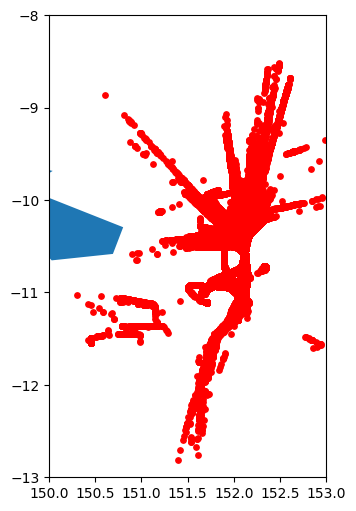

In [27]:
geometry = [Point(xy) for xy in zip(ais_cleaned['Longitude'], ais_cleaned['Latitude'])]
gdf = GeoDataFrame(ais_cleaned, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])

world = gpd.read_file(geodatasets.data.naturalearth.land['url'])

# Plot the world map
ax = world.plot(figsize=(10, 6))

# Plot your points on the map
gdf.plot(ax=ax, marker='o', color='red', markersize=15)

ax.set_xlim(150, 153) #long
ax.set_ylim(-13, -8) #lat

# Show the plot
plt.show()

Temporal distribution (start date – end date)

In [29]:
ais_cleaned.dtypes

Timestamp              object
Packet Type            object
Channel                object
Message Type          float64
MMSI                   object
Navigation Status      object
Repeat Indicator      float64
IMO                   float64
ROT                    object
SOG                    object
COG                   float64
Position Accuracy      object
Longitude             float64
Latitude              float64
Region                 object
Vessel name            object
Ship type              object
True Heading           object
Radio status          float64
Destination           float64
Maneuver Indicator     object
Draught               float64
Position fix type      object
Call sign             float64
ETA                    object
A                     float64
B                     float64
C                     float64
D                     float64
Error                  object
dtype: object

In [30]:
ais_cleaned['Timestamp'] = pd.to_datetime(ais_cleaned['Timestamp'])

In [31]:
start_date = ais_cleaned['Timestamp'].min()
end_date = ais_cleaned['Timestamp'].max()

print(f'Temporal Distribution:')
print(f'Start Date: {start_date}')
print(f'End Date: {end_date}')

Temporal Distribution:
Start Date: 2023-10-28 07:17:51
End Date: 2023-11-28 18:10:50.179000


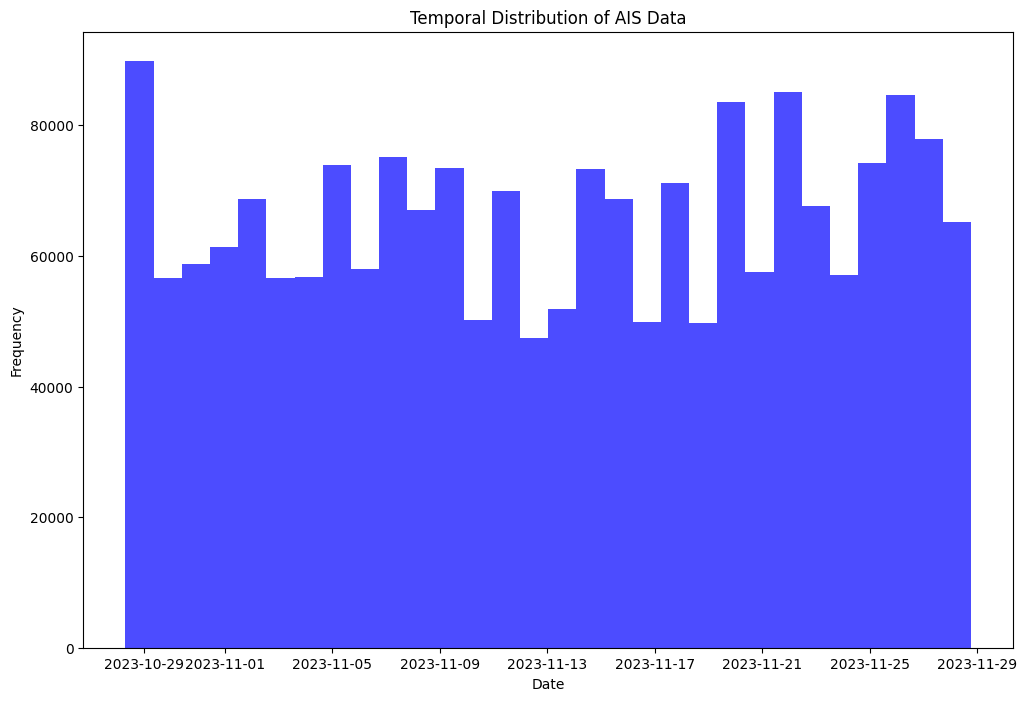

In [32]:
# histogram of the Timestamp
plt.figure(figsize=(12, 8))
plt.hist(ais_cleaned['Timestamp'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Temporal Distribution of AIS Data')
plt.show()


Unique ships in the dataset

In [34]:
num_unique_ships = ais_cleaned['MMSI'].nunique()

# Print the result
print(f'Number of Unique Ships Represented: {num_unique_ships}')

Number of Unique Ships Represented: 931
